In [1]:
import gym
import numpy as np
import time


def init_q(s, a, type="ones"):

    if type == "ones":
        return np.ones((s, a))
    elif type == "random":
        return np.random.random((s, a))
    elif type == "zeros":
        return np.zeros((s, a))


def epsilon_greedy(Q, epsilon, n_actions, s, train=False):

    if train or np.random.rand() < epsilon:
        action = np.argmax(Q[s, :])
    else:
        action = np.random.randint(0, n_actions)
    return action



def expected_sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests):
    data = []
    env = gym.make('Taxi-v3')
    n_states, n_actions = env.observation_space.n, env.action_space.n
    Q = init_q(n_states, n_actions, type="ones")
    timestep_reward = []
    for episode in range(episodes):
        #print(f"Episode: {episode}")
        total_reward = 0
        s = env.reset()
        t = 0
        done = False
        while t < max_steps:
            #if render:
            #env.render()
            t += 1
            a = epsilon_greedy(Q, epsilon, n_actions, s)
            s_, reward, done, info = env.step(a)
            total_reward += reward
            if done:
                Q[s, a] += alpha * ( reward  - Q[s, a] )
            else:
                expected_value = np.mean(Q[s_,:])
                # print(Q[s,:], sum(Q[s,:]), len(Q[s,:]), expected_value)
                Q[s, a] += alpha * (reward + (gamma * expected_value) - Q[s, a])
            s = s_
            if done:
                if True:
                    #print(f"This episode took {t} timesteps and reward {total_reward}")
                    data = data + [total_reward]
                
                timestep_reward.append(total_reward)
                break
    return timestep_reward, data


if __name__ =="__main__":
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.9
    episodes = 1000
    max_steps = 2500
    n_tests = 20
    data = []
    timestep_reward, data = expected_sarsa(alpha, gamma, epsilon,
                                     episodes, max_steps, n_tests,
                                     )
    print(timestep_reward)

[-498, -515, -596, -434, -452, -560, -587, -524, -452, -524, -650, -533, -407, -425, -317, -245, -587, -569, -551, -254, -282, -117, -281, -307, -587, -299, -308, -395, -326, -407, -317, -371, -254, -290, -290, -353, -416, -281, -263, -272, -479, -254, -254, -272, -290, -308, -362, -236, -385, -362, -317, -398, -407, -299, -290, -308, -151, -317, -236, -269, -254, -344, -254, -371, -224, -281, -317, -254, -78, -263, -102, -272, -272, -398, -281, -246, -299, -353, -326, -371, -130, -281, -272, -353, -95, -290, -70, -272, -380, -236, -254, -371, -452, -407, -317, -353, -353, -52, -344, -92, -233, -364, -308, -326, -380, -272, -83, -344, -254, -326, -407, -335, -254, -263, -121, -209, -326, -281, -263, -308, -33, -234, -290, -299, -215, -15, -230, -245, -254, -362, -290, -166, -299, -245, -290, -67, -416, -299, -344, -353, -263, -273, -255, -75, -241, -132, -308, -263, -281, -242, -227, -254, -225, -254, -272, -308, -174, -75, -13, -353, -299, -335, -182, -308, -317, -236, -263, -263, -98

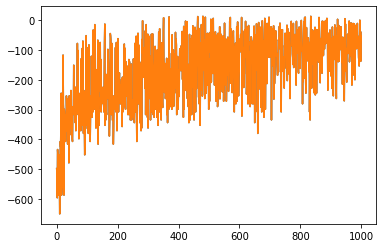

In [2]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.plot(data, )
plt.show()